In [2]:
!pip install tensorflow

  Using cached numpy-2.1.3-cp310-cp310-win_amd64.whl.metadata (60 kB)
  Using cached markdown_it_py-3.0.0-py3-none-any.whl.metadata (6.9 kB)
  Using cached mdurl-0.1.2-py3-none-any.whl.metadata (1.6 kB)
   ---------------------------------------- 0.0/375.7 MB ? eta -:--:--
   ---------------------------------------- 0.5/375.7 MB 4.2 MB/s eta 0:01:29
   ---------------------------------------- 1.6/375.7 MB 4.4 MB/s eta 0:01:25
   ---------------------------------------- 2.4/375.7 MB 4.2 MB/s eta 0:01:30
   ---------------------------------------- 3.4/375.7 MB 4.3 MB/s eta 0:01:27
   ---------------------------------------- 4.2/375.7 MB 4.2 MB/s eta 0:01:29
    --------------------------------------- 5.0/375.7 MB 4.3 MB/s eta 0:01:28
    --------------------------------------- 5.8/375.7 MB 4.1 MB/s eta 0:01:30
    --------------------------------------- 6.8/375.7 MB 4.2 MB/s eta 0:01:29
    --------------------------------------- 7.6/375.7 MB 4.1 MB/s eta 0:01:30
    --------------------

  You can safely remove it manually.
  You can safely remove it manually.


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.layers import LSTM
from sklearn.decomposition import PCA

## Data Loading

In [4]:
X_train_scaled = pd.read_pickle('data/X_train_scaled.pkl')
X_test_scaled = pd.read_pickle('data/X_test_scaled.pkl')
y_train_common = pd.read_pickle('data/y_train_common.pkl')
y_train_motor = pd.read_pickle('data/y_train_motor.pkl')
y_train_total = pd.read_pickle('data/y_train_total.pkl')
y_test_common = pd.read_pickle('data/y_test_common.pkl')
y_test_motor = pd.read_pickle('data/y_test_motor.pkl')
y_test_total = pd.read_pickle('data/y_test_total.pkl')

## Neural Netwrok

### Common Target

In [5]:
def r2_score(y_true, y_pred):
    ss_total = K.sum(K.square(y_true - K.mean(y_true)))
    ss_res = K.sum(K.square(y_true - y_pred))
    return (1 - ss_res / (ss_total + K.epsilon()))


In [ ]:
# def r2_score_target_1(y_true, y_pred):
#     ss_total = K.sum(K.square(y_true[:, 0] - K.mean(y_true[:, 0])))
#     ss_res = K.sum(K.square(y_true[:, 0] - y_pred[:, 0]))
#     return (1 - ss_res / (ss_total + K.epsilon()))

# def r2_score_target_2(y_true, y_pred):
#     ss_total = K.sum(K.square(y_true[:, 1] - K.mean(y_true[:, 1])))
#     ss_res = K.sum(K.square(y_true[:, 1] - y_pred[:, 1]))
#     return (1 - ss_res / (ss_total + K.epsilon()))


In [ ]:
# def loss_motor_updrs(y_true, y_pred):
#     return K.mean(K.square(y_true[:, 0] - y_pred[:, 0]))

# def loss_total_updrs(y_true, y_pred):
#     return K.mean(K.square(y_true[:, 1] - y_pred[:, 1]))


#### Model 1

In [6]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled)

In [7]:
model = Sequential()
model.add(Dense(256, input_dim=X_train_pca.shape[1], activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(2, activation='linear') )  # 2 outputs: motor_UPDRS and total_UPDRS

c:\Users\vikto\Desktop\Uni\Third year subjects\Biosignals\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[r2_score])

In [ ]:
# model.compile(optimizer=Adam(learning_rate=0.0005),
#               loss={'motor_total_output': 'mean_squared_error'},  # Use 'mean_squared_error' as total loss
#               metrics={'motor_total_output': ['mean_squared_error', r2_score_target_1, r2_score_target_2]})  # Specify metrics


In [9]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

In [10]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled) 
X_test_pca = pca.transform(X_test_scaled)

In [11]:
# history = model.fit(X_train_scaled, y_train_common, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_common),
#                     callbacks=[lr_scheduler, early_stopping], verbose=1)
history = model.fit(X_train_pca, y_train_common, epochs=100, batch_size=32, validation_data=(X_test_pca, y_test_common),
                    callbacks=[lr_scheduler, early_stopping], verbose=1)

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 747.8227 - r2_score: -5.7906 - val_loss: 577.2753 - val_r2_score: -25.7441 - learning_rate: 0.0010
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 591.5845 - r2_score: -4.3832 - val_loss: 313.8240 - val_r2_score: -12.1057 - learning_rate: 0.0010
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 308.6322 - r2_score: -1.7830 - val_loss: 95.2656 - val_r2_score: -1.9405 - learning_rate: 0.0010
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 125.7089 - r2_score: -0.1248 - val_loss: 65.4154 - val_r2_score: -1.8367 - learning_rate: 0.0010
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 77.8824 - r2_score: 0.3145 - val_loss: 71.5207 - val_r2_score: -2.0430 - learning_rate: 0.0010
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 72.7410 - r2_score: 0.3662 - val_loss: 71.5312 - val_r2_score: -2.1673 - learning_rate: 0.0010
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

In [12]:
# test_loss = model.evaluate(X_test_scaled, y_test_common)
test_loss = model.evaluate(X_test_pca, y_test_common)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 112.9362 - r2_score: -2.5416


In [13]:
# import matplotlib.pyplot as plt
# from matplotlib import rcParams

# # Set figure size for the plots
# rcParams['figure.figsize'] = 14, 10

# # Create a 3x2 grid of subplots
# fig, ax = plt.subplots(3, 2)

# # Plot Model Loss (Overall)
# ax[0, 0].plot(history.history['loss'], 'g', label='Train Loss')
# ax[0, 0].plot(history.history['val_loss'], 'r', label='Validation Loss')
# ax[0, 0].set_title('Model Loss (Overall)')
# ax[0, 0].set_ylabel('Loss')
# ax[0, 0].set_xlabel('Epochs')
# ax[0, 0].legend(loc='upper right')
# ax[0, 0].grid(True)

# # Plot Model R² (Overall)
# ax[0, 1].plot(history.history['r2_score'], 'g', label='Train R²')
# ax[0, 1].plot(history.history['val_r2_score'], 'r', label='Validation R²')
# ax[0, 1].set_title('Model R² (Overall)')
# ax[0, 1].set_ylabel('R²')
# ax[0, 1].set_xlabel('Epochs')
# ax[0, 1].legend(loc='lower right')
# ax[0, 1].grid(True)

# # Plot Loss for motor_UPDRS (target 1)
# ax[1, 0].plot(history.history['loss_motor_updrs'], 'g', label='Train Loss')
# ax[1, 0].plot(history.history['val_loss_motor_updrs'], 'r', label='Validation Loss')
# ax[1, 0].set_title('Model Loss (motor_UPDRS)')
# ax[1, 0].set_ylabel('Loss')
# ax[1, 0].set_xlabel('Epochs')
# ax[1, 0].legend(loc='upper right')
# ax[1, 0].grid(True)

# # Plot R² for motor_UPDRS (target 1)
# ax[1, 1].plot(history.history['r2_score_target_1'], 'g', label='Train R²')
# ax[1, 1].plot(history.history['val_r2_score_target_1'], 'r', label='Validation R²')
# ax[1, 1].set_title('Model R² (motor_UPDRS)')
# ax[1, 1].set_ylabel('R²')
# ax[1, 1].set_xlabel('Epochs')
# ax[1, 1].legend(loc='lower right')
# ax[1, 1].grid(True)

# # Plot Loss for total_UPDRS (target 2)
# ax[2, 0].plot(history.history['loss_total_updrs'], 'g', label='Train Loss')
# ax[2, 0].plot(history.history['val_loss_total_updrs'], 'r', label='Validation Loss')
# ax[2, 0].set_title('Model Loss (total_UPDRS)')
# ax[2, 0].set_ylabel('Loss')
# ax[2, 0].set_xlabel('Epochs')
# ax[2, 0].legend(loc='upper right')
# ax[2, 0].grid(True)

# # Plot R² for total_UPDRS (target 2)
# ax[2, 1].plot(history.history['r2_score_target_2'], 'g', label='Train R²')
# ax[2, 1].plot(history.history['val_r2_score_target_2'], 'r', label='Validation R²')
# ax[2, 1].set_title('Model R² (total_UPDRS)')
# ax[2, 1].set_ylabel('R²')
# ax[2, 1].set_xlabel('Epochs')
# ax[2, 1].legend(loc='lower right')
# ax[2, 1].grid(True)

# # Adjust layout to avoid overlap
# plt.tight_layout()

# # Show the plot
# plt.show()


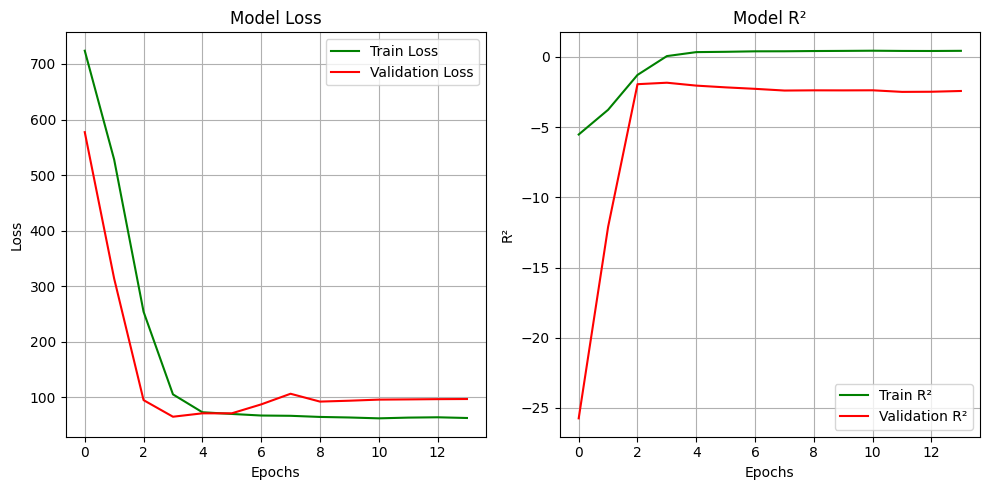

In [14]:
rcParams['figure.figsize'] = 10, 5

fig, ax = plt.subplots(1, 2)

ax[0].plot(history.history['loss'], 'g', label='Train Loss')
ax[0].plot(history.history['val_loss'], 'r', label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].legend(loc='upper right')
ax[0].grid(True)

ax[1].plot(history.history['r2_score'], 'g', label='Train R²')
ax[1].plot(history.history['val_r2_score'], 'r', label='Validation R²')
ax[1].set_title('Model R²')
ax[1].set_ylabel('R²')
ax[1].set_xlabel('Epochs')
ax[1].legend(loc='lower right')
ax[1].grid(True)

plt.tight_layout()
plt.show()

**NOT GOOD**

In [ ]:
# predictions = model.predict(X_test_scaled)

#### Model 2

In [15]:
model2 = Sequential()
model2.add(LSTM(128, input_shape=(X_train_scaled.shape[1], 1), activation='relu'))
model2.add(Dropout(0.3))
model2.add(Dense(1, activation='linear'))  # Single output for motor_UPDRS
model2.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[r2_score])

c:\Users\vikto\Desktop\Uni\Third year subjects\Biosignals\.venv\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [16]:
history2 = model2.fit(X_train_scaled, y_train_motor, epochs=100, batch_size=32, validation_data=(X_test_scaled, y_test_motor),
                    callbacks=[lr_scheduler, early_stopping], verbose=1)

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 351.4494 - r2_score: -4.1314 - val_loss: 62.3498 - val_r2_score: -71.7771 - learning_rate: 0.0010
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 84.2734 - r2_score: -0.1914 - val_loss: 38.9501 - val_r2_score: -45.8173 - learning_rate: 0.0010
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 85.2234 - r2_score: -0.1809 - val_loss: 37.1616 - val_r2_score: -24.9204 - learning_rate: 0.0010
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 84.5236 - r2_score: -0.2035 - val_loss: 32.5008 - val_r2_score: -30.6774 - learning_rate: 0.0010
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 82.2158 - r2_score: -0.1761 - val_loss: 36.5655 - val_r2_score: -41.4994 - learning_rate: 0.0010
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 80.3401 - r2_score: -0.1302 - val_loss: 57.3285 - val_r2_score: -72.2492 - learning_rate: 0.0010
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/ste

In [17]:
test_loss2 = model2.evaluate(X_test_scaled, y_test_motor)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 42.2708 - r2_score: -40.7075


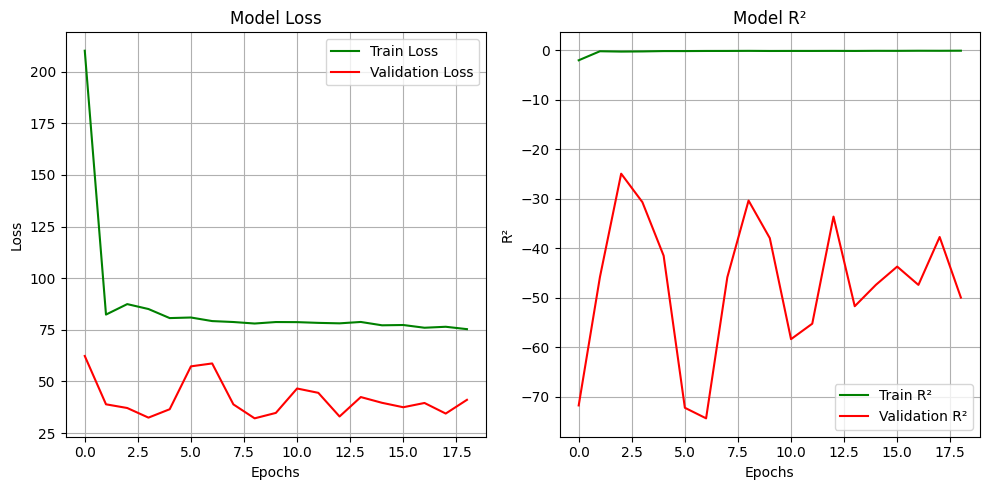

In [18]:
rcParams['figure.figsize'] = 10, 5
fig, ax = plt.subplots(1, 2)
ax[0].plot(history2.history['loss'], 'g', label='Train Loss')
ax[0].plot(history2.history['val_loss'], 'r', label='Validation Loss')
ax[0].set_title('Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].legend(loc='upper right')
ax[0].grid(True)
ax[1].plot(history2.history['r2_score'], 'g', label='Train R²')
ax[1].plot(history2.history['val_r2_score'], 'r', label='Validation R²')
ax[1].set_title('Model R²')
ax[1].set_ylabel('R²')
ax[1].set_xlabel('Epochs')
ax[1].legend(loc='lower right')
ax[1].grid(True)
plt.tight_layout()
plt.show()

### Seperate Targets

#### motor_UPDRS

In [19]:
motor_model = Sequential()
motor_model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
motor_model.add(BatchNormalization())
motor_model.add(Dropout(0.3))
motor_model.add(Dense(128, activation='relu'))
motor_model.add(BatchNormalization())
motor_model.add(Dropout(0.3))
motor_model.add(Dense(64, activation='relu'))
motor_model.add(BatchNormalization())
motor_model.add(Dense(1, activation='linear')) 

c:\Users\vikto\Desktop\Uni\Third year subjects\Biosignals\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
motor_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[r2_score])

In [21]:
early_stopping_motor = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler_motor = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)


In [22]:
history_motor = motor_model.fit(X_train_scaled, y_train_motor, epochs=100, batch_size=32,
                    validation_data=(X_test_scaled, y_test_motor),
                    callbacks=[lr_scheduler_motor, early_stopping_motor], verbose=1)

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 528.6524 - r2_score: -6.5133 - val_loss: 339.8139 - val_r2_score: -241.8930 - learning_rate: 0.0010
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 381.5276 - r2_score: -4.4226 - val_loss: 194.4540 - val_r2_score: -141.4203 - learning_rate: 0.0010
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 171.9097 - r2_score: -1.5534 - val_loss: 94.8921 - val_r2_score: -70.1321 - learning_rate: 0.0010
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 56.2651 - r2_score: 0.1915 - val_loss: 56.8637 - val_r2_score: -39.8325 - learning_rate: 0.0010
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.8763 - r2_score: 0.5068 - val_loss: 63.5885 - val_r2_score: -45.5348 - learning_rate: 0.0010
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 32.2166 - r2_score: 0.5576 - val_loss: 57.0500 - val_r2_score: -35.6540 - learning_rate: 0.0010
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/

In [23]:
motor_test_loss = motor_model.evaluate(X_test_scaled, y_test_motor)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 104.6718 - r2_score: -83.0289  


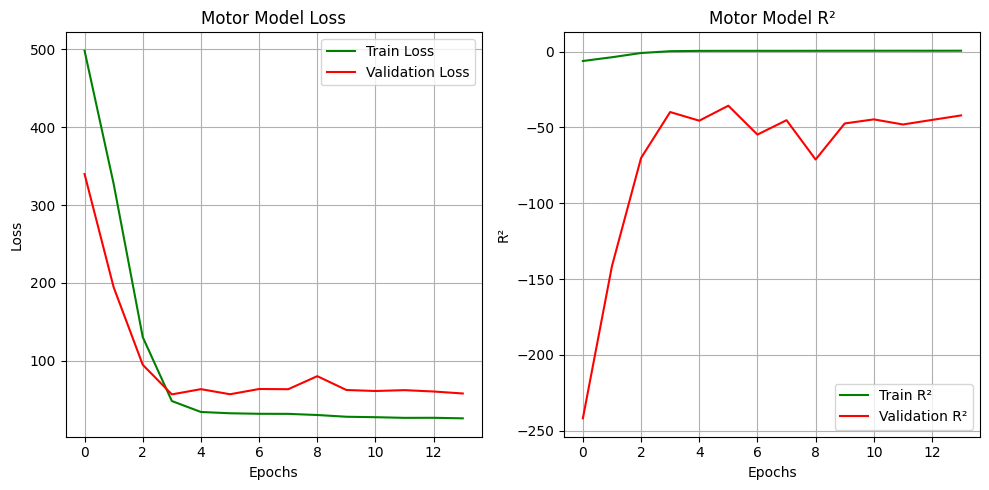

In [24]:
rcParams['figure.figsize'] = 10, 5
fig, ax = plt.subplots(1, 2)
ax[0].plot(history_motor.history['loss'], 'g', label='Train Loss')
ax[0].plot(history_motor.history['val_loss'], 'r', label='Validation Loss')
ax[0].set_title('Motor Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].legend(loc='upper right')
ax[0].grid(True)
ax[1].plot(history_motor.history['r2_score'], 'g', label='Train R²')
ax[1].plot(history_motor.history['val_r2_score'], 'r', label='Validation R²')
ax[1].set_title('Motor Model R²')
ax[1].set_ylabel('R²')
ax[1].set_xlabel('Epochs')
ax[1].legend(loc='lower right')
ax[1].grid(True)
plt.tight_layout()
plt.show()

**NOT GOOD**

#### total_UPDRS

In [25]:
total_model = Sequential()
total_model.add(Dense(256, input_dim=X_train_scaled.shape[1], activation='relu'))
total_model.add(BatchNormalization())
total_model.add(Dropout(0.3))
total_model.add(Dense(128, activation='relu'))
total_model.add(BatchNormalization())
total_model.add(Dropout(0.3))
total_model.add(Dense(64, activation='relu'))
total_model.add(BatchNormalization())
total_model.add(Dense(1, activation='linear'))

c:\Users\vikto\Desktop\Uni\Third year subjects\Biosignals\.venv\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
total_model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=[r2_score])

In [27]:
early_stopping_total = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
lr_scheduler_total = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, min_lr=1e-6)

In [28]:
history_total = total_model.fit(X_train_scaled, y_train_total, epochs=100, batch_size=32,
                    validation_data=(X_test_scaled, y_test_total),
                    callbacks=[lr_scheduler_total, early_stopping_total], verbose=1)

Epoch 1/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 980.7933 - r2_score: -6.9233 - val_loss: 791.6041 - val_r2_score: -275.8944 - learning_rate: 0.0010
Epoch 2/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 757.0773 - r2_score: -5.4806 - val_loss: 498.7237 - val_r2_score: -164.8183 - learning_rate: 0.0010
Epoch 3/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 407.8682 - r2_score: -2.4099 - val_loss: 252.8144 - val_r2_score: -76.9934 - learning_rate: 0.0010
Epoch 4/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 152.4641 - r2_score: -0.3200 - val_loss: 164.1821 - val_r2_score: -59.1501 - learning_rate: 0.0010
Epoch 5/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.1871 - r2_score: 0.4488 - val_loss: 165.8473 - val_r2_score: -78.3777 - learning_rate: 0.0010
Epoch 6/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 60.9483 - r2_score: 0.5045 - val_loss: 141.4049 - val_r2_score: -47.8459 - learning_rate: 0.0010
Epoch 7/100
135/135 ━━━━━━━━━━━━━━━━━━━━ 0

In [29]:
total_test_loss = total_model.evaluate(X_test_scaled, y_test_total)

39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 229.8672 - r2_score: -80.4939


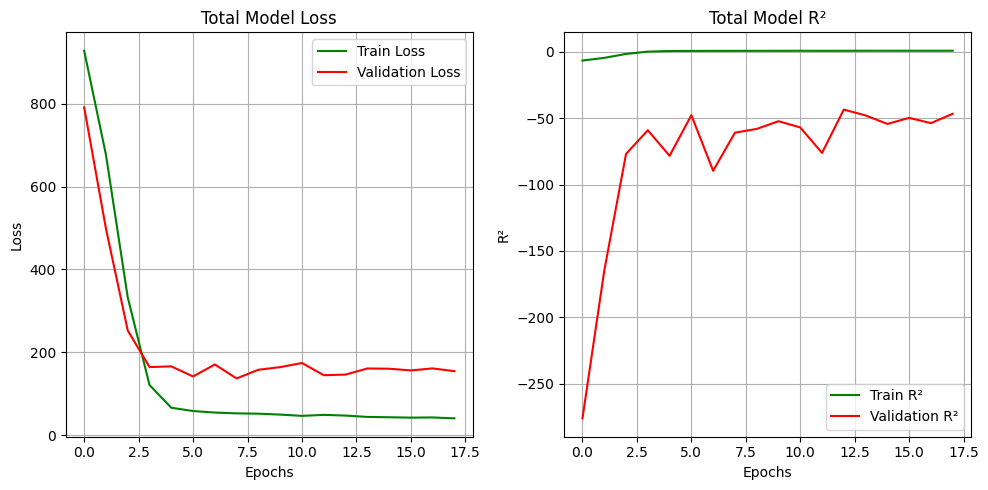

In [30]:
rcParams['figure.figsize'] = 10, 5
fig, ax = plt.subplots(1, 2)
ax[0].plot(history_total.history['loss'], 'g', label='Train Loss')
ax[0].plot(history_total.history['val_loss'], 'r', label='Validation Loss')
ax[0].set_title('Total Model Loss')
ax[0].set_ylabel('Loss')
ax[0].set_xlabel('Epochs')
ax[0].legend(loc='upper right')
ax[0].grid(True)
ax[1].plot(history_total.history['r2_score'], 'g', label='Train R²')
ax[1].plot(history_total.history['val_r2_score'], 'r', label='Validation R²')
ax[1].set_title('Total Model R²')
ax[1].set_ylabel('R²')
ax[1].set_xlabel('Epochs')
ax[1].legend(loc='lower right')
ax[1].grid(True)
plt.tight_layout()
plt.show()

**NOT GOOD**